# **Limpieza del Conjunto de Datos**


## Integrantes del equipo

Eduardo Rodriguez Lopez
Diego Armando Ulibarri Hernandez
Maria Fernanda Ramirez Barragan
Raul Youthan Irigoyen Osorio
Renata Montserrat De Luna Flore
Roberto Valdez Jasso

### Instrucciones:

1.  Descarguen el sets de datos del reto y analícenlo en equipo antes de empezar a limpiarlo.
2.    Limpien los datos usando herramientas de ETL.
3.    Expliquen y documenten cada decisión que hayan tomado sobre cómo limpiar los atributos y valores. Sean claros en sus explicaciones y concretos, respuestas ambiguas no serán tomadas en cuenta.
4.    Suban los scripts utilizados para limpiar los valores y su documentación a su repositorio de equipo del reto. 

# **Importación de librerias**

In [2]:
#Librerias necesarias para la actividad

import pandas as pd
import numpy as np 
import pylab
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import random

# **Instalación API kaggle**

Nos Conectamos a la API de Kaggle
Como tambien

In [ ]:
!pip install -q kaggle

In [ ]:
# Agregamos el API Key de Kaggle
# Nota: Cada quien debe tener su propia key diaria para poder tener
# acceso a los datos de kaggle.

files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# **Descarga del DataSet**

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 98.9MB/s]


In [8]:
!unzip spaceship-titanic.zip -d "/content/kaggledbtitanic"

Archive:  spaceship-titanic.zip
replace /content/kaggledbtitanic/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/kaggledbtitanic/sample_submission.csv  
replace /content/kaggledbtitanic/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/kaggledbtitanic/test.csv  
replace /content/kaggledbtitanic/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/kaggledbtitanic/train.csv  


# **Analisis de datos**

In [3]:
# Para poder ver todo los datos disponibles del dataframe
# corre esta celda
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
# Generamos la el Dataframe/Dataset 
# Con el csv  kagglebtitanic csv

df_original_space_titanic = pd.read_csv("/content/kaggledbtitanic/train.csv")
#Una vez ya creado, vemos los primeros 10  datos de la tabla
df_original_space_titanic.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Revisamos los datos primero, para asi ver con que estamos trabajando.

In [5]:
# Primero Hay que denotar el tipo de variables con las que vamos trabajar

df_original_space_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Vamos  ver con que tantos datos  (filas) estamos trabajando
len(df_original_space_titanic)
# Tenemos 8693 filas con datos (no sabemos si estam bien o mal, pero existen)

8693

In [7]:
df_original_space_titanic.shape # 8693 Filas y 14 columnas

(8693, 14)

In [14]:
# Ahora veremos  cuales tiene valores vacios en sus filas

df_original_space_titanic.isnull().sum()


# Vemos que si tiene valores vacios en gran parte de las columnas
# eso es bueno y malo al mismo tiempo, ya que no debemos preocuparmos (por ahora)
# por valores vacios, ahora bien hay que preocuparnos que el dataset tenga 
# inconsitencias en las mismas

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
# Veamos que tanto datos (en porcentaje) tenemos perdidos/faltantes

df_original_space_titanic.isnull().sum() * 100/df_original_space_titanic.shape[0]

#En si por columna que tenemos vacia se tiene almenos un 2% de los datos en su totalidad
# eso es bueno y malo al mismo tiempo, ya que no debemos preocuparmos (por ahora)
# por valores vacios, ahora bien hay que preocuparnos que el dataset tenga 
# inconsitencias en las mismas.

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [16]:
# Para Checar lo anterior debemos buscar valores unicos en el dataset
# Vamos a Checarlos todos  (Por cada Colummnas)

print(f'Columna PassengerId \n{df_original_space_titanic["PassengerId"].unique()}')
print('/----------------------------------------/')

print(f'Columna HomePlanet \n{df_original_space_titanic["HomePlanet"].unique()}')
print('/----------------------------------------/')

print(f'Columna CryoSleep \n{df_original_space_titanic["CryoSleep"].unique()}')
print('/----------------------------------------/')

print(f'Columna Cabin \n{df_original_space_titanic["Cabin"].unique()}')
print('/----------------------------------------/')

print(f'Columna Destination \n{df_original_space_titanic["Destination"].unique()}')
print('/----------------------------------------/')

print(f'Columna Age \n{df_original_space_titanic["Age"].unique()}')
print('/----------------------------------------/')

print(f'Columna VIP \n{df_original_space_titanic["VIP"].unique()}')
print('/----------------------------------------/')

print(f'Columna RoomService \n{df_original_space_titanic["RoomService"].unique()}')
print('/----------------------------------------/')

print(f'Columna FoodCourt \n{df_original_space_titanic["FoodCourt"].unique()}')
print('/----------------------------------------/')

print(f'Columna ShoppingMall \n{df_original_space_titanic["ShoppingMall"].unique()}')
print('/----------------------------------------/')

print(f'Columna Spa \n{df_original_space_titanic["Spa"].unique()}')
print('/----------------------------------------/')

print(f'Columna VRDeck \n{df_original_space_titanic["VRDeck"].unique()}')
print('/----------------------------------------/')

print(f'Columna Name \n{df_original_space_titanic["Name"].unique()}')
print('/----------------------------------------/')

print(f'Columna Transported \n{df_original_space_titanic["Transported"].unique()}')
print('/----------------------------------------/')

Columna PassengerId 
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
/----------------------------------------/
Columna HomePlanet 
['Europa' 'Earth' 'Mars' nan]
/----------------------------------------/
Columna CryoSleep 
[False True nan]
/----------------------------------------/
Columna Cabin 
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
/----------------------------------------/
Columna Destination 
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
/----------------------------------------/
Columna Age 
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
/----------------------------------------/
Columna VIP 
[False True nan]
/----------------------------------------/
Colum

In [17]:
# Conteo de Valores
print(df_original_space_titanic.columns.values)
print('/----------------------------------------/')
print(df_original_space_titanic['HomePlanet'].value_counts())
print('/----------------------------------------/')
print(df_original_space_titanic['Destination'].value_counts())
print('/----------------------------------------/')
print(df_original_space_titanic['VIP'].value_counts())
print('/----------------------------------------/')
print(df_original_space_titanic['Transported'].value_counts())
print('/----------------------------------------/')
print(df_original_space_titanic['Cabin'].str[0].value_counts())
print('/----------------------------------------/')
print(df_original_space_titanic['CryoSleep'].value_counts())
print('/----------------------------------------/')

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']
/----------------------------------------/
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
/----------------------------------------/
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
/----------------------------------------/
False    8291
True      199
Name: VIP, dtype: int64
/----------------------------------------/
True     4378
False    4315
Name: Transported, dtype: int64
/----------------------------------------/
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64
/----------------------------------------/
False    5439
True     3037
Name: CryoSleep, dtype: int64
/----------------------------------------/


In [18]:
# Descripcion estadistica entera del dataset
df_original_space_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [19]:
# Checamos si hay duplicados
dupli = df_original_space_titanic.duplicated().sum()
dupli # Al parecer no hay duplicados
      # lo cual es bueno y podemos denotar que cada valor es unico
     
#elim = df_auto_original.drop_duplicates()
#elim # Si hacemos esto se mantiene igual debido a que o hay duplicados

0

In [21]:
# Correlacion de las columnas entre si.
corr = df_original_space_titanic.corr()
corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


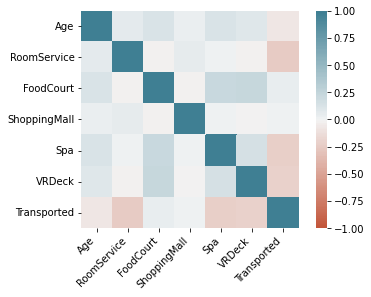

In [24]:
# Graficacion de los datos correlacionados.
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##Distribuccion de datos



Aqui veremos como estan las distribucciones de las variables en base a los datos disponibles

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


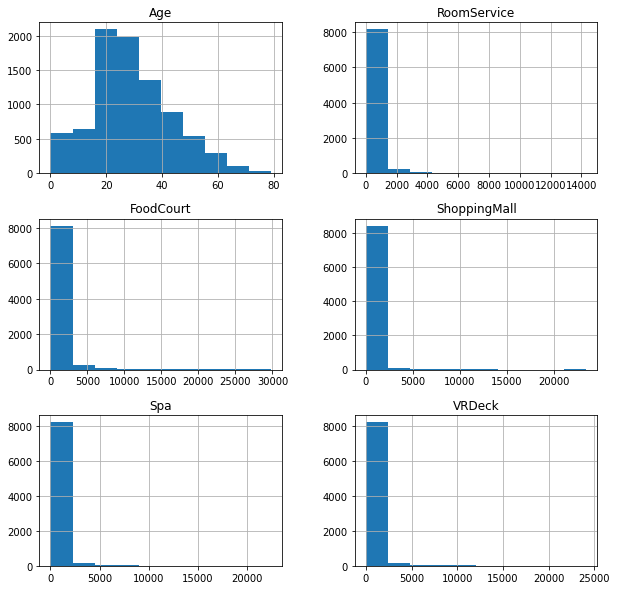

In [23]:
# Generamos una figura para graficar todas las columnas con datos (posibles) 
# numericas para visualizarlas y ver con que estamos trabajando
fig, ax = plt.subplots(figsize=(10,10))
df_original_space_titanic.hist(ax=ax)
plt.show() # presentamos la graficacion

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


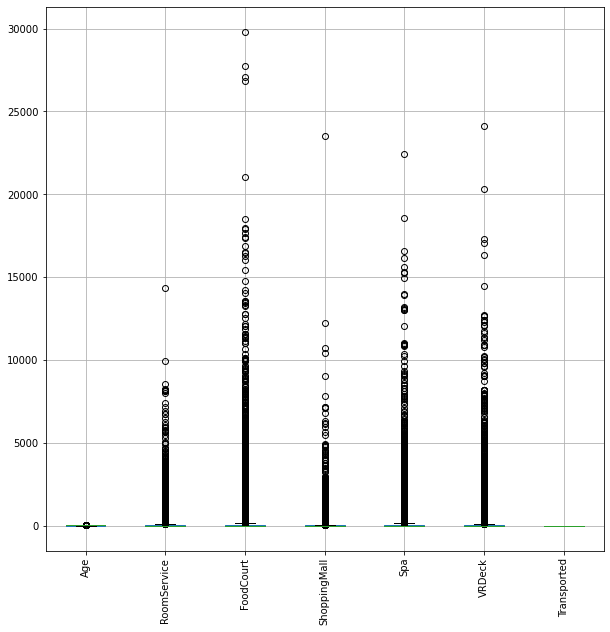

In [25]:
# Generamos una figura para graficar todas las columnas con datos (posibles) 
# numericos para visualizarlas y ver con los valores atipicos disponibles
fig, ax = plt.subplots(figsize=(10,10))
df_original_space_titanic.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

# Label Encoder / OneHotEncoder

Antes de Realizar una Imputacion de los datos faltantes, es importante tambien trabajar con los datos/variables categoricas que se puede utilizar mas adelante para su analisis utiles y predicciones mas adelante.

Esto se realiza para evitar, que al momento de imputar por medio de la media, mediana, promedio  modas , entre otras formas, generar problemas que esten sean posibles por las  variables categoricas presentes.

Ahora bien, las columnas Ok para realizar el Label Enconder

1. HomePlanet 	
    
    Descripcion: El planeta del que partió el pasajero, típicamente su planeta de residencia permanente.

    Tiene Vacios: SI -  201

    Metodo: OneHotEncoderFeature
2. CryoSleep 	
    
    Descripcion: Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

    Tiene Vacios: SI - 217

    Metodo: OneHotEncoderFeature 

3. Destination	
    
    Descripcion: El planeta al que desembarcará el pasajero.

    Tiene Vacios: SI - 182

    Metodo: OneHotEncoderFeature 

4. VIP
    
    Descripcion: Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

    Tiene Vacios:  SI - 203

    Metodo: OneHotEncoderFeature

5. Name	 
    
    Descripcion: Los nombres y apellidos del pasajero.

    Tiene Vacios:  SI 200 

    Tiene Importancia: no, porque no tiene relacion directa con losd datos analizar

    Metodo: LabelEncoder (Generadara MUCHOS  valores unicos)

6. Transported  
    
    Descripcion: Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

    Tiene Vacios: NO 

    Tiene Importancia:  SI, buscamos saber si los pasajeros tuvieron y tendran la posiblidad de pasar a la otra dimension.

In [16]:
# Copia del dataframe Original 
labelEncoder_copy_Data = df_original_space_titanic.copy()

In [17]:
missing_feature_freq = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# Rellenado de valores por frecuencia de  los mismos
def missing_fill(df):
    for feature in missing_feature_freq:
        most_freq = df[feature].value_counts().index[0]
        df[feature] = df[feature].fillna(most_freq)
    return df

# Extraccion de los dato de la columna  cabin
# Extraccion de la cabina inicial
def extractMainDeck(s):
    return s.split('/')[0]
# Extraccion de la del numero de cabina
def extractNumber(s):
    return s.split('/')[1]
# Extraccion de del area de la cabina (lado de la nave espacial (Ventana o pasillo))
def extractSide(s):
    return s.split('/')[2]

# Tumbar columnas no Necesarias
def drop_columns(df):
    drop_column = ['PassengerId', 'Cabin', 'Name'] # Duda con el PassengerId
    for ft in drop_column:
        df = df.drop(ft, axis = 1)
    return df

# LabelEncoder
def encoder(df):
    # Columnas para el labeLEncoder
    bool_columns = ['CryoSleep', 'VIP']
    dum_columns = ['Deck']
    
    # Por cada de las columnas los pasamos a string
    for bool_ft in bool_columns:
        df[bool_ft] = df[bool_ft].astype('str')
    # Por cada de las columnas generamos el label Encoder
    # y de ahi los  pasamos a int    
    for dum in dum_columns:
        LabelEnco = LabelEncoder()
        LabelEnco.fit_transform(df[dum])    
    df['Num'] = df['Num'].astype('int')
    # gereramos dummies
    df = pd.get_dummies(df)
    return df # y regresamos el dataframe

def categoricalPreprossesing(df):
    # Llamada de las funciones
    df = missing_fill(df)
    # Llamada de la funcion de los datos de la columna cabina
    df['Deck'] = df['Cabin'].apply(extractMainDeck)
    df['Num'] = df['Cabin'].apply(extractNumber)
    df['Side'] = df['Cabin'].apply(extractSide)
    df = drop_columns(df) # Tumbamos las columnas
    df = encoder(df) # Label Encoder
    
    return df # regresamos el df ya finalmente modificado


In [18]:
df_original_space_titanic.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [19]:
categorical_trasformation = categoricalPreprossesing(labelEncoder_copy_Data)
categorical_trasformation.head(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
5,44.0,0.0,483.0,0.0,291.0,0.0,True,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
6,26.0,42.0,1539.0,3.0,0.0,0.0,True,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
7,28.0,0.0,0.0,0.0,0.0,NaN,True,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
8,35.0,0.0,785.0,17.0,216.0,0.0,True,3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
9,14.0,0.0,0.0,0.0,0.0,0.0,True,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [20]:
# Checamos los vacios de ls nuevos datos numericos
categorical_trasformation.isnull().sum()
# ya quedaron todos datos categoricos a numericos, solo fataria los
# datos numericos originales y asi crear el modelo de los datos

Age                          179
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Num                            0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_False                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_False                      0
VIP_True                       0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
dtype: int64

In [21]:
label_encoder = LabelEncoder() # llamamos al encoder
# Columnas variable para Label Encoder

In [22]:
# Label encoder con la columna Transported
# Transported
transported = categorical_trasformation['Transported']
transported_encoder = label_encoder.fit_transform(transported)
transported_DF = pd.DataFrame(transported_encoder, columns=['Transported']) # dataframe
categorical_trasformation.drop(columns=['Transported'], inplace = True)
df_new_trasform_space_titanic= pd.concat([categorical_trasformation,transported_DF], axis = 1, verify_integrity=True)

In [23]:
# Checamos que efecto los datos se realizan de manera correcta
df_new_trasform_space_titanic.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1


# Nota: 
Realizamos el siguiente label Enconder para ver la correlacion entre el nombre y la traportacion

In [82]:
# Generando la traduccion de categoricos a  numericos

name = df_original_space_titanic['Name']
name_encoder = label_encoder.fit_transform(name)
name = pd.DataFrame(name_encoder, columns=['Name']) # Dataframe

In [83]:
transported = df_original_space_titanic['Transported']
transported_encoder = label_encoder.fit_transform(transported)
transported = pd.DataFrame(transported_encoder, columns=['Transported']) # dataframe

In [84]:
# Borramos las columnas originales
test = df_original_space_titanic.drop(columns=['Name','Transported'], inplace = True)
#Concatenamos los nuevos datframes al original
test = pd.concat([name,test,transported], axis = 1, verify_integrity=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


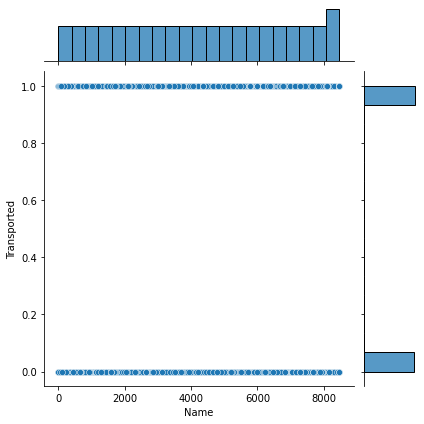

In [86]:
sns.jointplot(test['Name'], test['Transported'])
# Ya visto el grafico podemos denotar que que ambas columnas no tiene correlacion
# por lo tanto no lo tomamos en cuenta para la prueba y prediccion mas 
# adelante.

# **Imputacion de datos**


Ahora si, generamos la imputacion de los datos fatantes numericos
por medio 


de la:

1. Media
2. Mediana
3. Moda

# **Por Media**


In [ ]:
# Generamos una copia del dataframe con los datos  categoricos trasformados
imputeData_copy_Data = df_new_trasform_space_titanic.copy()
#imputeData_copy_Data.head(10)

In [27]:
# Realizamos la modelacion y pruebas de imputacion de datos por  la media

#Proceso de imputación de datos con la media
room_service_mean = imputeData_copy_Data['RoomService'].mean()
imputeData_copy_Data['RoomService'] = imputeData_copy_Data['RoomService'].fillna(room_service_mean)

food_court_mean = imputeData_copy_Data['FoodCourt'].mean()
imputeData_copy_Data['FoodCourt'] = imputeData_copy_Data['FoodCourt'].fillna(food_court_mean)

shopping_mall_mean = imputeData_copy_Data['ShoppingMall'].mean()
imputeData_copy_Data['ShoppingMall'] = imputeData_copy_Data['ShoppingMall'].fillna(shopping_mall_mean)

spa_mean = imputeData_copy_Data['Spa'].mean()
imputeData_copy_Data['Spa'] = imputeData_copy_Data['Spa'].fillna(spa_mean)

vrdeck_mean = imputeData_copy_Data['VRDeck'].mean()
imputeData_copy_Data['VRDeck'] = imputeData_copy_Data['VRDeck'].fillna(vrdeck_mean)

age_mean = imputeData_copy_Data['Age'].mean()
imputeData_copy_Data['Age'] = imputeData_copy_Data['Age'].fillna(age_mean)

In [28]:
# Ha algunos casos que hay  personas que  tiene 0 años
# arreglamos eso de la siguiente manera:
imputeData_copy_Data['Age'].replace({0.0000: age_mean}, inplace = True)

In [29]:
imputeData_copy_Data['Age'] = imputeData_copy_Data['Age'].astype(int)

# **Por Mediana**


In [ ]:
imputeData_copy_Data_median = df_new_trasform_space_titanic.copy()
imputeData_copy_Data_median.head(10)

In [26]:
# Proceso de imputación con la mediana
room_service_median = imputeData_copy_Data_median['RoomService'].median()
imputeData_copy_Data_median['RoomService'] = imputeData_copy_Data_median['RoomService'].fillna(room_service_median)

age_median = imputeData_copy_Data_median['Age'].median()
imputeData_copy_Data_median['Age'] = imputeData_copy_Data_median['Age'].fillna(age_median)

food_court_median = imputeData_copy_Data_median['FoodCourt'].median()
imputeData_copy_Data_median['FoodCourt'] = imputeData_copy_Data_median['FoodCourt'].fillna(food_court_median)

shopping_mall_median = imputeData_copy_Data_median['ShoppingMall'].median()
imputeData_copy_Data_median['ShoppingMall'] = imputeData_copy_Data_median['ShoppingMall'].fillna(shopping_mall_median)

spa_median = imputeData_copy_Data_median['Spa'].median()
imputeData_copy_Data_median['Spa'] = imputeData_copy_Data_median['Spa'].fillna(spa_median)

vrdeck_median = imputeData_copy_Data_median['VRDeck'].median()
imputeData_copy_Data_median['VRDeck'] = imputeData_copy_Data_median['RoomService'].fillna(vrdeck_median)


In [ ]:
imputeData_copy_Data_median.isna().sum()

In [31]:
#Para personas que tienen 0 años
imputeData_copy_Data_median['Age'].replace({0.0000: age_median}, inplace = True)

In [32]:
imputeData_copy_Data_median['Age'] = imputeData_copy_Data_median['Age'].astype(int)

# **Por Moda**

In [33]:
imputeData_copy_Data_mode = df_new_trasform_space_titanic.copy()

In [34]:
# Proceso de imputación con la moda
room_service_mode = imputeData_copy_Data_mode['RoomService'].mode()
imputeData_copy_Data_mode['RoomService'] = imputeData_copy_Data_mode['RoomService'].fillna(room_service_mode[0])

age_mode = imputeData_copy_Data_mode['Age'].mode()
imputeData_copy_Data_mode['Age'] = imputeData_copy_Data_mode['Age'].fillna(age_mode[0])

food_court_mode = imputeData_copy_Data_mode['FoodCourt'].mode()
imputeData_copy_Data_mode['FoodCourt'] = imputeData_copy_Data_mode['FoodCourt'].fillna(food_court_mode[0])

shopping_mall_mode = imputeData_copy_Data_mode['ShoppingMall'].mode()
imputeData_copy_Data_mode['ShoppingMall'] = imputeData_copy_Data_mode['ShoppingMall'].fillna(shopping_mall_mode[0])

spa_mode = imputeData_copy_Data_mode['Spa'].mode()
imputeData_copy_Data_mode['Spa'] = imputeData_copy_Data_mode['Spa'].fillna(spa_mode[0])

vrdeck_mode = imputeData_copy_Data_mode['VRDeck'].mode()
imputeData_copy_Data_mode['VRDeck'] = imputeData_copy_Data_mode['RoomService'].fillna(vrdeck_mode[0])

In [35]:
# Remplazando la edad de las personas con 0 años
imputeData_copy_Data_mode['Age'].replace({0.0000: age_mode[0]}, inplace = True)

In [ ]:
imputeData_copy_Data_mode.isna().sum()

In [38]:
# Convirtiendo los datos de age en enteros
imputeData_copy_Data_mode['Age'] = imputeData_copy_Data_mode['Age'].astype(int)

# Analisis de los resultados de la imputacion de los datos

finalmente, checamos cuál es el mejor método para imputar los datos faltantes
en base al tipo de dato presentado en cada columna, como tambien los datos 

In [41]:
# Analisis de Room Services
print('Room service mean: ', str(room_service_mean))
print('Room service median: ', str(room_service_median))
print('Room service mode: ', str(room_service_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['RoomService'].head(10) )
print('/-------------------------------------------/')

Room service mean:  220.0093178419418
Room service median:  0.0
Room service mode:  0.0
/-------------------------------------------/
Datos originales: 
0      0.0
1    109.0
2     43.0
3      0.0
4    303.0
5      0.0
6     42.0
7      0.0
8      0.0
9      0.0
Name: RoomService, dtype: float64
/-------------------------------------------/


In [ ]:
# Nuevo Dataset: 
imputeData_new_Data = df_new_trasform_space_titanic.copy()
imputeData_new_Data.head(5)

El mejor método para imputar los datos en la columna de Room service es la media, ya que la mediana y la moda tienen valor de 0.0 y podría afectar los resultados.

In [45]:
# agregamos los nuevos datos de la media a los datos faltantes
imputeData_new_Data['RoomService'] = imputeData_new_Data['RoomService'].fillna(room_service_mean)
#imputeData_new_Data.head(5)

In [47]:
# Analisis de Age
print('Age mean: ', str(age_mean))
print('Age median: ', str(age_median))
print('Age mode: ', str(age_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['Age'].head(10) )
print('/-------------------------------------------/')

Age mean:  28.790291038766824
Age median:  27.0
Age mode:  24.0
/-------------------------------------------/
Datos originales: 
0    39.0
1    24.0
2    58.0
3    33.0
4    16.0
5    44.0
6    26.0
7    28.0
8    35.0
9    14.0
Name: Age, dtype: float64
/-------------------------------------------/


En el caso de la edad, elegiremos la mediana.

In [48]:
# agregamos los nuevos datos de la mediana a los datos faltantes
imputeData_new_Data['Age'] = imputeData_new_Data['Age'].fillna(age_median)
#imputeData_new_Data.head(5)

In [53]:
# Analisis de FoodCourt
print('Food Court mean: ', str(food_court_mean))
print('Food Court median: ', str(food_court_median))
print('Food Court mode: ', str(food_court_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['FoodCourt'].head(10) )
print('/-------------------------------------------/')

Food Court mean:  448.4340273783504
Food Court median:  0.0
Food Court mode:  0.0
/-------------------------------------------/
Datos originales: 
0       0.0
1       9.0
2    3576.0
3    1283.0
4      70.0
5     483.0
6    1539.0
7       0.0
8     785.0
9       0.0
Name: FoodCourt, dtype: float64
/-------------------------------------------/


Para la columna de Food Court, utilizaremos la media para la imputación de datos, ya que los ceros pueden alterar los resultados. 

In [52]:
imputeData_new_Data['FoodCourt'] = imputeData_new_Data['FoodCourt'].fillna(food_court_mean)

In [ ]:
# Analisis de Shopping Mall
print('Shopping Mall mean: ', str(shopping_mall_mean))
print('Shopping Mall median: ', str(shopping_mall_median))
print('Shopping Mall mode: ', str(shopping_mall_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['ShoppingMall'].head(10) )
print('/-------------------------------------------/')

Para la imputación de datos de la columna Shopping Mall, utilizaremos la media.

In [56]:
imputeData_new_Data['ShoppingMall'] = imputeData_new_Data['ShoppingMall'].fillna(shopping_mall_mean)

In [ ]:
# Analisis de Spa
print('Spa mean: ', str(spa_mean))
print('Spa median: ', str(spa_median))
print('Spa mode: ', str(spa_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['Spa'].head(10) )
print('/-------------------------------------------/')

Spa mean:  311.1387779083431
Spa median:  0.0
Spa mode:  0.0


0       0.0
1     549.0
2    6715.0
3    3329.0
4     565.0
5     291.0
6       0.0
7       0.0
8     216.0
9       0.0
Name: Spa, dtype: float64

In [58]:
imputeData_new_Data['Spa'] = imputeData_new_Data['Spa'].fillna(spa_mean)

In [60]:
# Analisis de VRDeck
print('VRDeck mean: ', str(vrdeck_mean))
print('VRDeck median: ', str(vrdeck_median))
print('VRDeck mode: ', str(vrdeck_mode[0]))
print('/-------------------------------------------/')
# Analisis del datos originales
print('Datos originales: ')
print(df_original_space_titanic['VRDeck'].head(10) )
print('/-------------------------------------------/')

VRDeck mean:  220.0093178419418
VRDeck median:  0.0
VRDeck mode:  0.0
/-------------------------------------------/
Datos originales: 
0      0.0
1     44.0
2     49.0
3    193.0
4      2.0
5      0.0
6      0.0
7      NaN
8      0.0
9      0.0
Name: VRDeck, dtype: float64
/-------------------------------------------/


In [61]:
imputeData_new_Data['VRDeck'] = imputeData_new_Data['VRDeck'].fillna(vrdeck_mean)

In [64]:
imputeData_new_Data.head(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Transported
0,39.0,0.0,0.0,0.0,0.0,0.000000,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.000000,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,58.0,43.0,3576.0,0.0,6715.0,49.000000,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.000000,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.000000,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
5,44.0,0.0,483.0,0.0,291.0,0.000000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1
6,26.0,42.0,1539.0,3.0,0.0,0.000000,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
7,28.0,0.0,0.0,0.0,0.0,220.009318,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1
8,35.0,0.0,785.0,17.0,216.0,0.000000,3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
9,14.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1


In [63]:
# Checamos que ya todos los datos esten completos
imputeData_new_Data.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
Transported                  0
dtype: int64

In [65]:
# Por ultimo generamos un nuevo dataframe para su uso en el despliegue del
# modelo de inteligencia artificial

# Nuevo Dataframe: 
df_new_space_titanic_fullData = imputeData_new_Data.copy()
df_new_space_titanic_fullData.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1


In [66]:
# Checamos que ya todos los datos esten completos
imputeData_new_Data.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
Transported                  0
dtype: int64